# 03 - Model Evaluation

Evaluate trained models: per-label metrics, PR curves, threshold optimization,
confusion analysis, and sliced evaluation.

In [ ]:
import sys
sys.path.insert(0, '../../nlp_pipeline')

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.evaluate import (
    compute_metrics, compute_pr_curves, optimize_thresholds,
    slice_metrics, full_evaluation
)
from src.utils.io_utils import load_json

## Load Evaluation Results

Load predictions from a trained model. Adjust paths as needed.

In [3]:
# Option A: Load from saved evaluation
metrics = load_json('../../nlp_pipeline/outputs/eval/metrics.json')
pr_curves = load_json('../../nlp_pipeline/outputs/eval/pr_curves.json')

# Option B: Compute from arrays (after training)
# y_true = np.load('../../nlp_pipeline/outputs/y_test.npy')
# y_proba = np.load('../../nlp_pipeline/outputs/y_test_proba.npy')
# y_pred = (y_proba >= 0.5).astype(int)
# metrics = compute_metrics(y_true, y_pred, y_proba)

print('Load your model predictions to run evaluation.')

Load your model predictions to run evaluation.


## Per-Label Metrics

In [4]:
CRITIQUE_LABELS = [
    'STANDARDIZATION', 'PSEUDO_INDIVIDUALIZATION',
    'COMMODIFICATION_MARKET_LOGIC', 'REGRESSIVE_LISTENING',
    'AFFECTIVE_PREPACKAGING', 'FORMAL_RESISTANCE'
]

# Uncomment after loading metrics:
metrics_df = pd.DataFrame(metrics['per_label']).T
metrics_df[['precision', 'recall', 'f1', 'support']]

,precision,recall,f1,support
STANDARDIZATION,0.5000,0.6000,0.5455,5.0
PSEUDO_INDIVIDUALIZATION,0.0000,0.0000,0.0000,1.0
COMMODIFICATION_MARKET_LOGIC,0.0714,0.3333,0.1176,3.0
REGRESSIVE_LISTENING,0.0000,0.0000,0.0000,1.0
AFFECTIVE_PREPACKAGING,0.0000,0.0000,0.0000,1.0
FORMAL_RESISTANCE,0.0000,0.0000,0.0000,2.0


## PR Curves

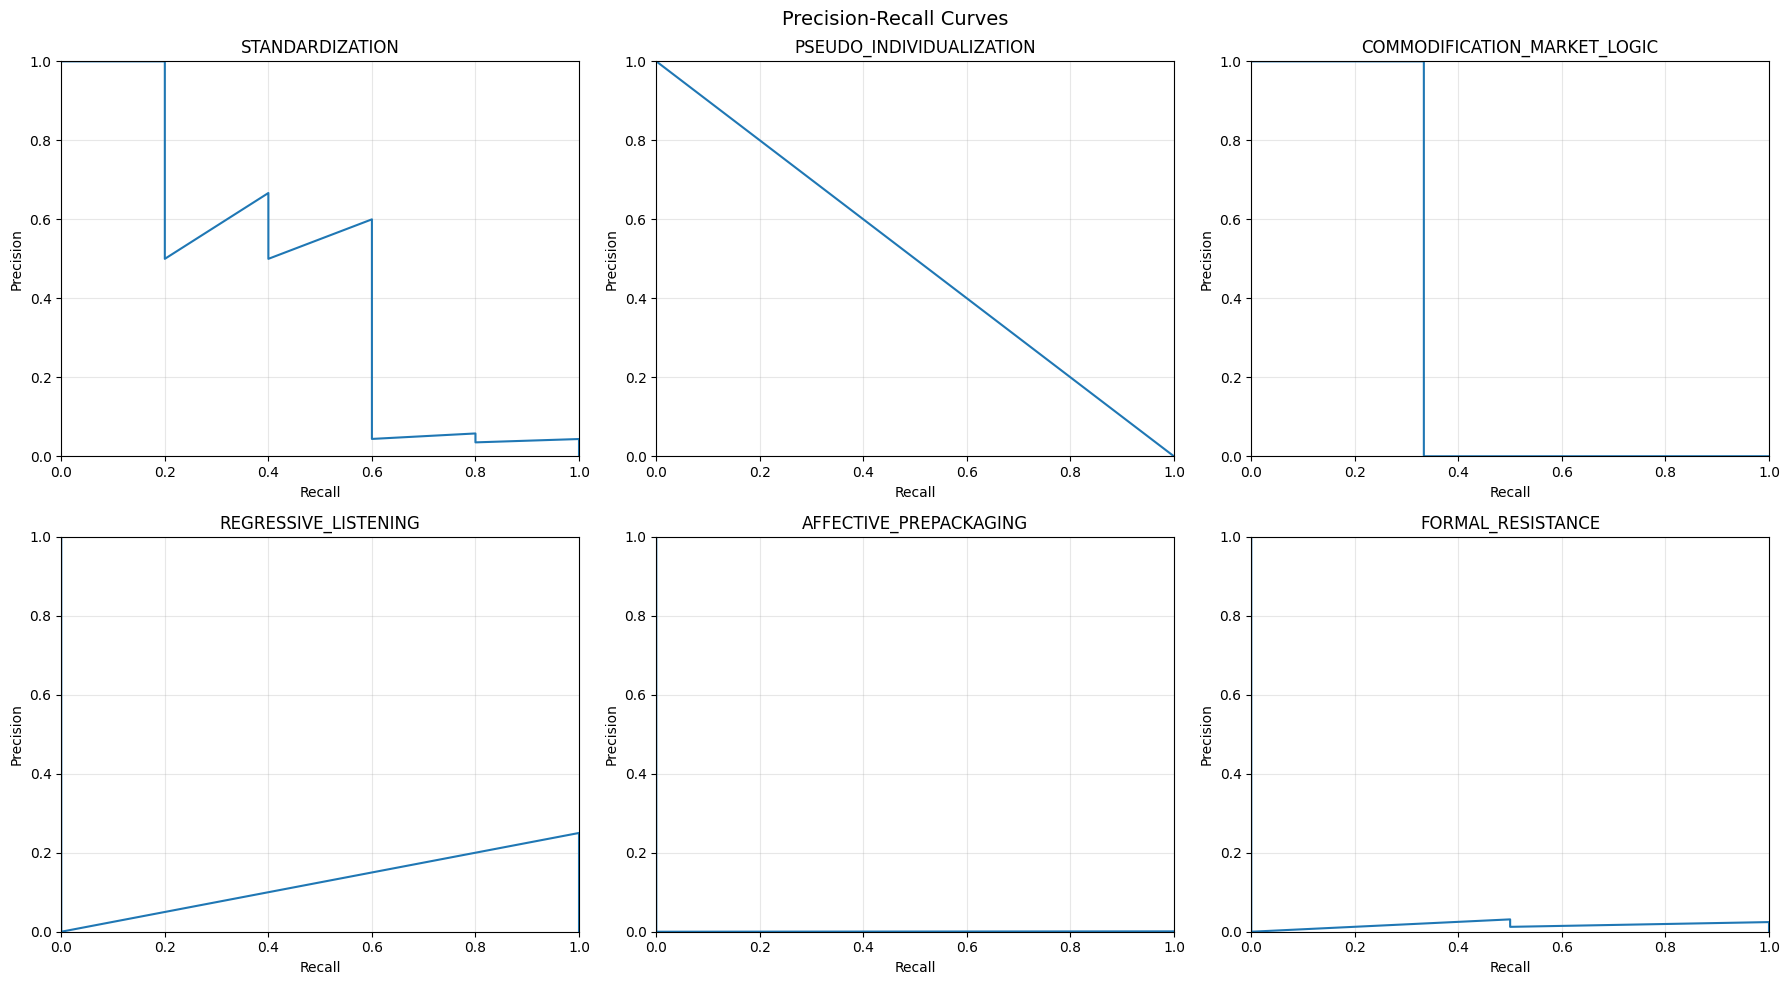

Uncomment after training a model.


In [5]:
# Uncomment after loading PR curves:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, lbl in zip(axes.flat, CRITIQUE_LABELS):
    if lbl in pr_curves:
        ax.plot(pr_curves[lbl]['recall'], pr_curves[lbl]['precision'])
        ax.set_title(lbl)
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3)
plt.suptitle('Precision-Recall Curves', fontsize=14)
plt.tight_layout()
plt.show()
print('Uncomment after training a model.')

## Threshold Optimization

In [ ]:
# # Uncomment after loading predictions:
# opt_thresholds = optimize_thresholds(y_true, y_proba)
# for lbl, thresh in opt_thresholds.items():
#     print(f'{lbl}: {thresh:.3f}')
# print('Run threshold optimization after training.')

NameError: name 'y_true' is not defined

## Co-occurrence Matrix

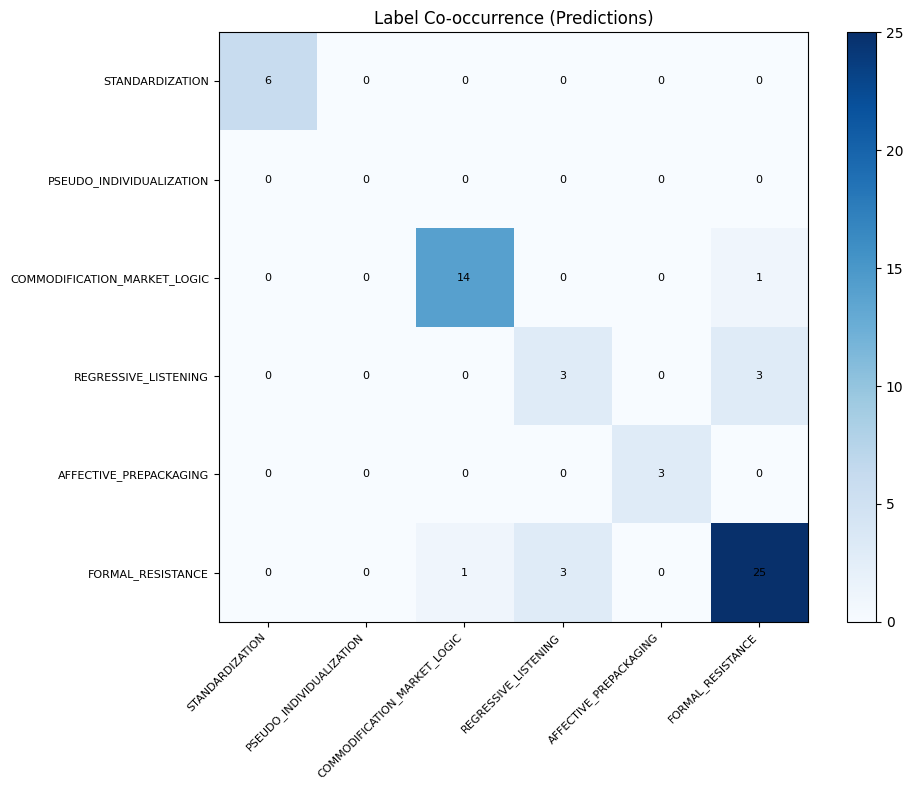

Uncomment after training.


In [7]:
# Uncomment after loading metrics:
cooc = np.array(metrics['cooccurrence_matrix']['matrix'])
labels = metrics['cooccurrence_matrix']['labels']
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cooc, cmap='Blues')
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(labels, fontsize=8)
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, str(cooc[i][j]), ha='center', va='center', fontsize=8)
plt.colorbar(im)
plt.title('Label Co-occurrence (Predictions)')
plt.tight_layout()
plt.show()
print('Uncomment after training.')